In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [171]:
df = pd.read_csv("Spotify_Song_Attributes.csv")

In [172]:
df.describe()

,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.008000e+04,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9530.000000,9.530000e+03,9530.000000
mean,1.519657e+06,0.602469,0.563524,5.241973,-8.685077,0.612382,0.078468,0.362924,0.153215,0.174589,0.434113,119.374474,2.029311e+05,3.917524
std,5.317343e+06,0.157745,0.243548,3.570615,5.414814,0.487232,0.080101,0.334337,0.313132,0.130749,0.242761,28.993087,9.587253e+04,0.386189
min,0.000000e+00,0.000000,0.001080,0.000000,-42.044000,0.000000,0.000000,0.000002,0.000000,0.024900,0.000000,0.000000,1.002700e+04,0.000000
25%,1.367800e+05,0.509000,0.403000,2.000000,-10.189000,0.000000,0.036100,0.053800,0.000000,0.096200,0.237000,97.568000,1.616970e+05,4.000000
50%,2.662875e+05,0.623000,0.589000,5.000000,-7.218000,1.000000,0.047900,0.245000,0.000025,0.119000,0.409000,119.822000,1.942860e+05,4.000000
75%,1.186307e+06,0.714000,0.751000,8.000000,-5.336000,1.000000,0.081900,0.668000,0.027600,0.209000,0.614000,139.785000,2.295260e+05,4.000000
max,1.583671e+08,0.976000,0.999000,11.000000,3.010000,1.000000,0.966000,0.996000,0.993000,0.964000,0.986000,236.196000,4.581483e+06,5.000000


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackName         10080 non-null  object 
 1   artistName        10080 non-null  object 
 2   msPlayed          10080 non-null  int64  
 3   genre             8580 non-null   object 
 4   danceability      9530 non-null   float64
 5   energy            9530 non-null   float64
 6   key               9530 non-null   float64
 7   loudness          9530 non-null   float64
 8   mode              9530 non-null   float64
 9   speechiness       9530 non-null   float64
 10  acousticness      9530 non-null   float64
 11  instrumentalness  9530 non-null   float64
 12  liveness          9530 non-null   float64
 13  valence           9530 non-null   float64
 14  tempo             9530 non-null   float64
 15  type              9530 non-null   object 
 16  id                9530 non-null   object

In [174]:
df["type"].unique()

array(['audio_features', nan], dtype=object)

In [175]:
df = df.drop(['type', 'uri', 'track_href', 'analysis_url', 'trackName'  ], axis=1)

In [176]:
train, test = train_test_split(df, test_size=0.2, random_state=40)

- artistname ----> Categorical
- msplayed ----> Numerical
- genre ----> Categorical
- danceability ----> Numerical
- energy ----> Numerical
- key ----> Numerical
- loudness ----> Numerical
- mode ----> Categorical
- speechiness ----> Numerical
- acousticness ----> Numerical
- instrumentalness --> Numerical
- liveness ----> Numerical
- valence ----> Numerical
- tempo ----> Numerical
- duratrion_ms ----> Numerical
- time_signature ----> Categorical

In [177]:
df.isna().sum()

artistName             0
msPlayed               0
genre               1500
danceability         550
energy               550
key                  550
loudness             550
mode                 550
speechiness          550
acousticness         550
instrumentalness     550
liveness             550
valence              550
tempo                550
id                   550
duration_ms          550
time_signature       550
dtype: int64

In [178]:
df["genre"].fillna("NI" , inplace = True)

In [179]:
numeric_columns = ['msPlayed', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'key']

In [180]:
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean() , inplace = False)

In [181]:
categorical_columns = [ 'mode', 'time_signature']

In [182]:
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

In [183]:
df.sort_values("msPlayed" , ascending = False)

,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
4194,RADWIMPS,158367130,j-pop,0.372,0.4260,11.0,-8.421,1.0,0.0339,0.68700,0.007840,0.1090,0.287,123.993,3A4FRzgve9BjfKbvVXRIFO,537653.0,4.0
9234,RADWIMPS,158367130,j-pop,0.372,0.4260,11.0,-8.421,1.0,0.0339,0.68700,0.007840,0.1090,0.287,123.993,3A4FRzgve9BjfKbvVXRIFO,537653.0,4.0
1001,Yoh kamiyama,109652914,japanese teen pop,0.613,0.8570,7.0,-5.272,1.0,0.0271,0.06860,0.000079,0.2560,0.698,147.974,7FpABRyv5TaZz0llkhjPgc,250792.0,4.0
6041,Yoh kamiyama,109652914,japanese teen pop,0.613,0.8570,7.0,-5.272,1.0,0.0271,0.06860,0.000079,0.2560,0.698,147.974,7FpABRyv5TaZz0llkhjPgc,250792.0,4.0
7098,Blake Rose,105798353,australian electropop,0.317,0.5450,11.0,-6.439,0.0,0.0468,0.03900,0.000000,0.1160,0.140,139.014,2dPT9UxyHm71quNyj3C4YE,205462.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,Sachin-Jigar,0,filmi,0.671,0.6700,9.0,-9.544,1.0,0.3960,0.44700,0.000011,0.0638,0.700,106.540,4hrU4dZNOExd0Lxlvp5aih,241053.0,3.0
6056,Bri-C,0,sad rap,0.798,0.4820,4.0,-9.035,0.0,0.2060,0.00368,0.000000,0.1220,0.689,92.012,0glQyuYv0ylzFhVLJh55E2,156687.0,4.0
8976,Kato,0,anime lo-fi,0.719,0.0252,5.0,-27.685,1.0,0.0757,0.99200,0.966000,0.1670,0.572,139.987,06devWd30OlmRDQJTGidBM,55324.0,4.0
455,Terrace Martin,0,alternative r&b,0.773,0.5790,8.0,-10.109,1.0,0.0862,0.29700,0.009540,0.0607,0.555,170.040,3dvRD7tnKF9Kxocks07jue,197173.0,4.0


In [184]:
%%time
df["msPlayed"].mean()

CPU times: user 443 µs, sys: 0 ns, total: 443 µs
Wall time: 453 µs


1519657.4646825397

In [185]:
%%time
sum = 0
cnt = 0
for i in df["msPlayed"]:
  sum += i
  cnt += 1
sum / cnt

CPU times: user 5.19 ms, sys: 1.02 ms, total: 6.22 ms
Wall time: 11.3 ms


1519657.4646825397

In [186]:
%%time
sum = 0
for i in df["msPlayed"]:
  sum += i
sum / len(df["msPlayed"])

CPU times: user 5.56 ms, sys: 984 µs, total: 6.54 ms
Wall time: 9.71 ms


1519657.4646825397

In [187]:
df["danceable"] = 0
df["danceable"][df["danceability"] >= 0.5] = 1

<ipython-input-187-4d3e37585c34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["danceable"][df["danceability"] >= 0.5] = 1


In [188]:
cnd = (df["genre"].value_counts() > 10)
gdf = df[(df["genre"].isin(cnd[cnd == True].index) == True)&(df["genre"]!="NI")]
gdf10 = gdf.groupby("genre").agg({"energy" : "mean"}).reset_index().sort_values("energy" , ascending = False).head(10)

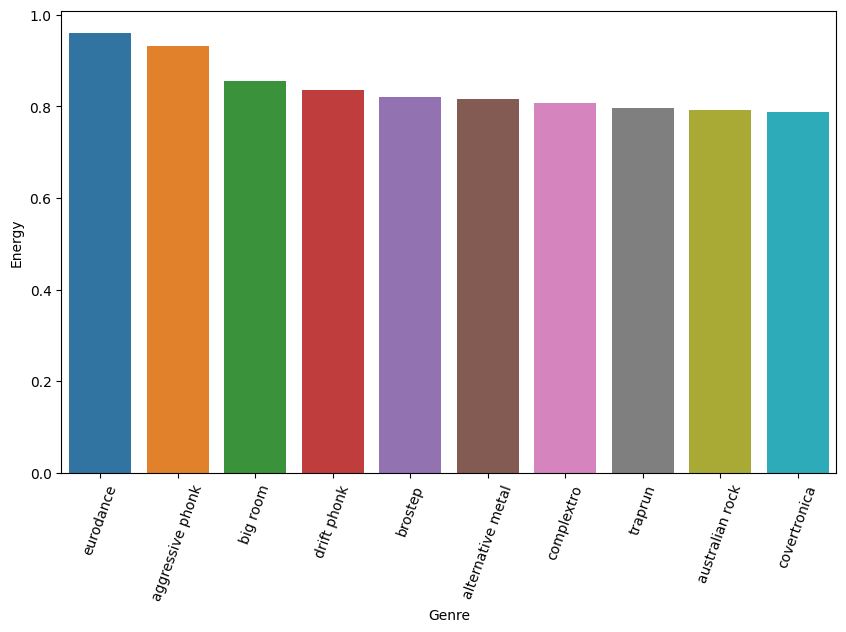

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=gdf10["genre"], y=gdf10["energy"])
plt.xticks(rotation=70)
plt.xlabel('Genre')
plt.ylabel('Energy')
plt.show()

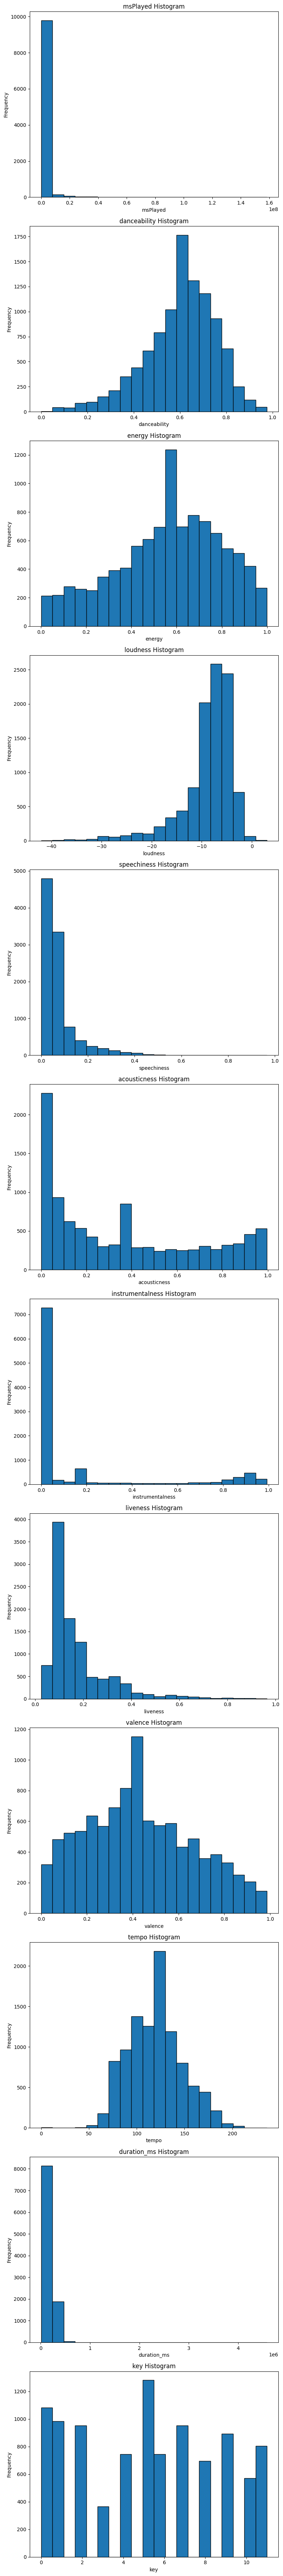

In [190]:
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(8, 6*len(numeric_columns)))

# Plot histograms for each numerical column
for i, col in enumerate(numeric_columns):
    axes[i].hist(df[col], bins=20, edgecolor='black', alpha=1)
    axes[i].set_title(col + ' Histogram')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [191]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df

,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,danceable
0,Nico Collins,-0.249740,NI,-8.245832e-01,0.994416,-3.577467e-01,7.115408e-01,0.0,1.714571,-1.066609,-0.503246,6.482660e-01,6.053704e-01,1.517036,7dTxqsaFGHOXwtzHINjfHv,-0.117825,4.0,0
1,London Symphony Orchestra,0.053897,british orchestra,-8.311033e-01,-1.830775,5.063947e-01,-1.715930e+00,1.0,-0.352688,1.701402,2.636804,-5.788718e-01,-1.322325e+00,-0.253054,14Qcrx6Dfjvcj0H8oV8oUW,-0.558964,4.0,0
2,SyKo,-0.258421,glitchcore,5.772293e-01,1.057761,-1.221888e+00,9.301650e-01,0.0,0.494760,-1.065994,-0.503246,1.505689e+00,3.172752e-01,0.448306,7K9Z3yFNNLv5kwTjQYGjnu,-0.614921,4.0,1
3,Good Morning,-0.281094,experimental pop,1.403854e-01,0.137146,-3.577467e-01,-2.125315e-01,1.0,-0.604355,0.344775,0.163522,-4.372790e-01,1.956875e+00,0.056564,3koAwrM1RO0TGMeQJ3qt9J,-1.216774,4.0,1
4,Cutting Crew,0.749526,album rock,1.469055e-01,0.686137,1.658583e+00,-5.160603e-01,0.0,-0.437433,-1.067840,-0.502691,-8.817231e-01,3.088018e-01,0.197610,4ByEFOBuLXpCqvO1kw8Wdm,0.831075,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,Ben Zaidi,-0.160084,folk-pop,-4.268597e-01,-1.775876,-9.338409e-01,-1.577841e+00,1.0,-0.582526,1.839834,-0.484458,-5.080754e-01,-8.012118e-01,0.416592,6o8pM5reLgjd5i8gDY3Irt,0.213441,3.0,1
10076,Dire Straits,-0.228561,NI,1.447744e-15,0.000000,-2.558372e-16,-3.374064e-16,1.0,0.000000,0.000000,0.000000,2.183328e-16,2.351837e-16,0.000000,NaN,0.000000,4.0,1
10077,just valery,-0.267451,sad lo-fi,-2.089475e+00,-1.712531,2.183476e-01,1.713431e-01,1.0,-0.608207,0.230954,-0.063113,2.355246e+00,-7.885017e-01,-1.923497,1EoThnDm6kQfB2idIfR30n,-0.969251,4.0,0
10078,Billie Eilish,-0.099948,art pop,1.925459e-01,-1.180432,1.082489e+00,-1.014280e+00,0.0,0.020959,1.750623,-0.501682,4.594756e-01,-9.579694e-01,0.364232,042Sl6Mn83JHyLEqdK7uI0,0.460932,4.0,1


In [192]:
cor = df[numeric_columns].corr()

In [193]:
cor

,msPlayed,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key
msPlayed,1.000000,-0.017019,-0.035611,0.000188,-0.035264,0.014291,-0.041200,-0.025794,-0.010501,0.003014,0.059757,0.026107
danceability,-0.017019,1.000000,0.277729,0.325836,0.180340,-0.261199,-0.229848,0.006503,0.484760,0.009501,-0.120999,0.020130
energy,-0.035611,0.277729,1.000000,0.797092,0.159274,-0.765161,-0.367535,0.192994,0.448547,0.194298,0.130395,0.018073
loudness,0.000188,0.325836,0.797092,1.000000,0.117273,-0.644611,-0.574075,0.135925,0.382998,0.172717,0.111417,0.004905
speechiness,-0.035264,0.180340,0.159274,0.117273,1.000000,-0.104853,-0.107087,0.138333,0.131875,0.110031,-0.086864,0.000495
acousticness,0.014291,-0.261199,-0.765161,-0.644611,-0.104853,1.000000,0.322443,-0.129970,-0.305580,-0.169778,-0.111690,-0.004327
instrumentalness,-0.041200,-0.229848,-0.367535,-0.574075,-0.107087,0.322443,1.000000,-0.055113,-0.308459,-0.097843,-0.101331,-0.005269
liveness,-0.025794,0.006503,0.192994,0.135925,0.138333,-0.129970,-0.055113,1.000000,0.076991,0.013823,-0.006291,0.035003
valence,-0.010501,0.484760,0.448547,0.382998,0.131875,-0.305580,-0.308459,0.076991,1.000000,0.110969,-0.019807,0.047748
tempo,0.003014,0.009501,0.194298,0.172717,0.110031,-0.169778,-0.097843,0.013823,0.110969,1.000000,0.000187,0.012974


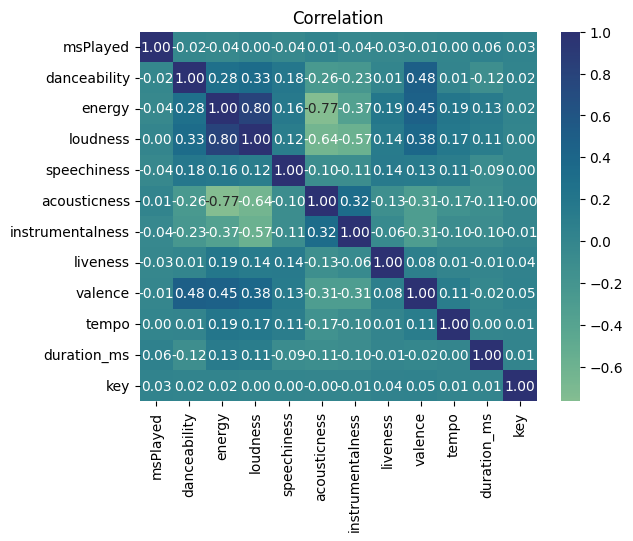

In [194]:
plt.figure()
sns.heatmap(cor, annot=True, cmap='crest', center=0 , fmt=".2f")
plt.title('Correlation')
plt.show()

In [195]:
g = df.groupby('danceable').agg({'msPlayed': ['mean', 'std'],
                                         'danceability': ['mean', 'std'],
                                         'energy': ['mean', 'std'],
                                         'loudness': ['mean', 'std'],
                                         'speechiness': ['mean', 'std'],
                                         'acousticness': ['mean', 'std'],
                                         'instrumentalness': ['mean', 'std'],
                                         'liveness': ['mean', 'std'],
                                         'valence': ['mean', 'std'],
                                         'tempo': ['mean', 'std'],
                                         'duration_ms': ['mean', 'std']})

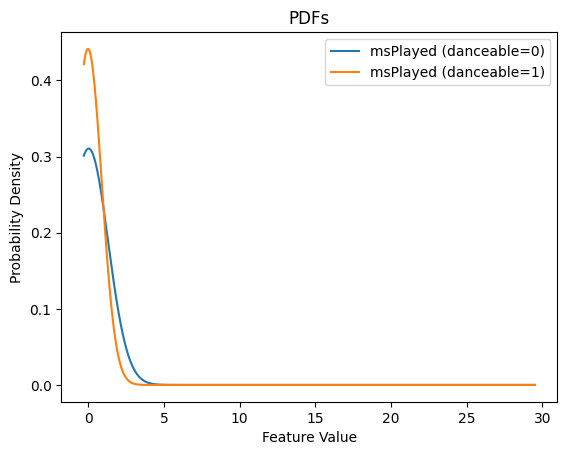

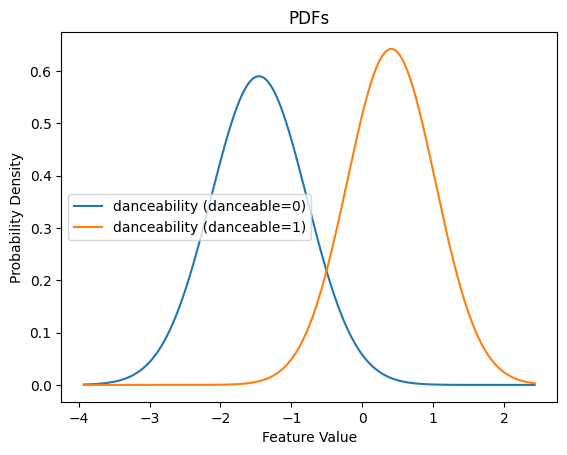

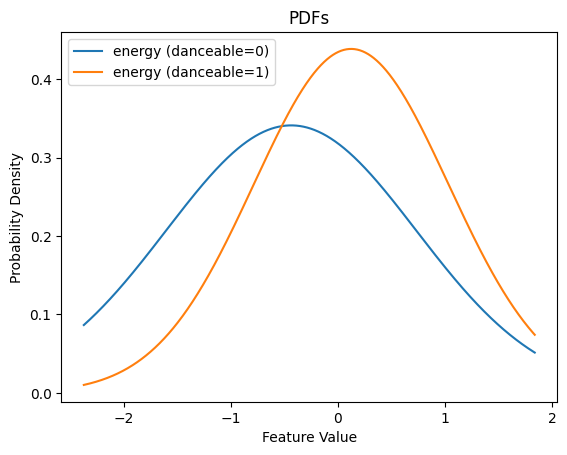

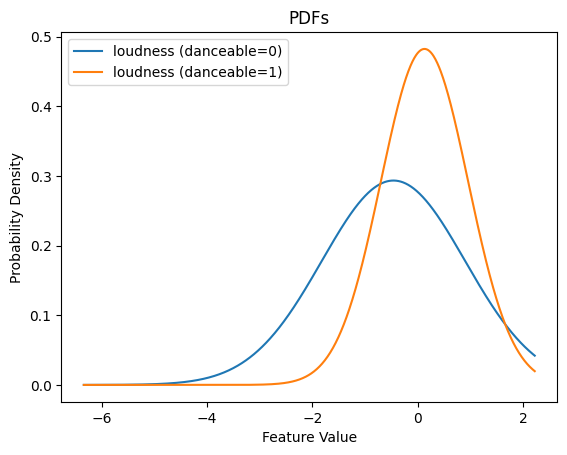

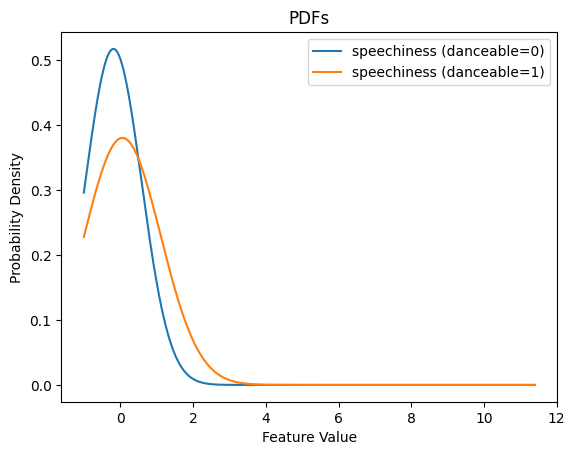

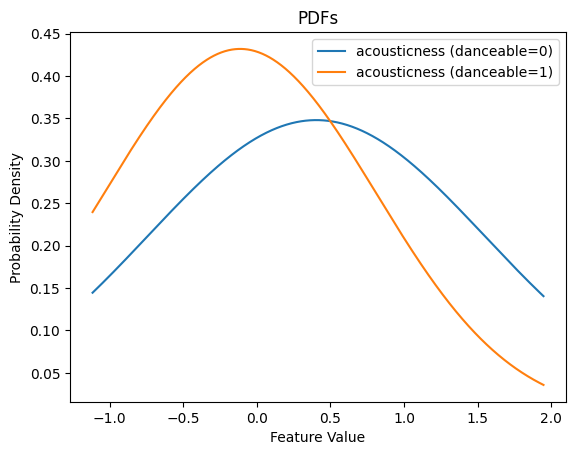

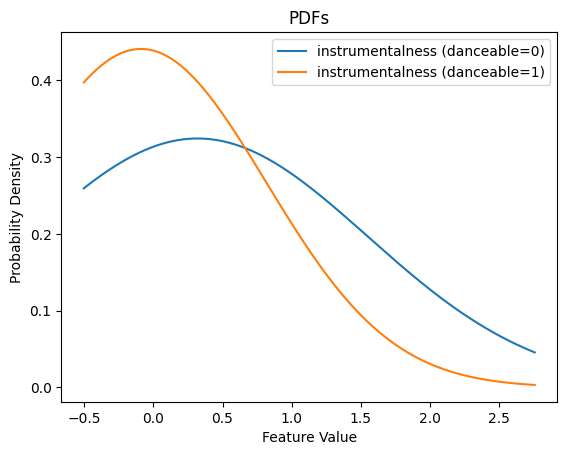

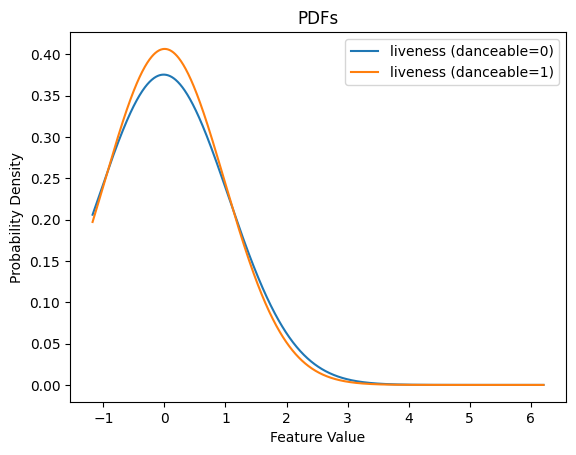

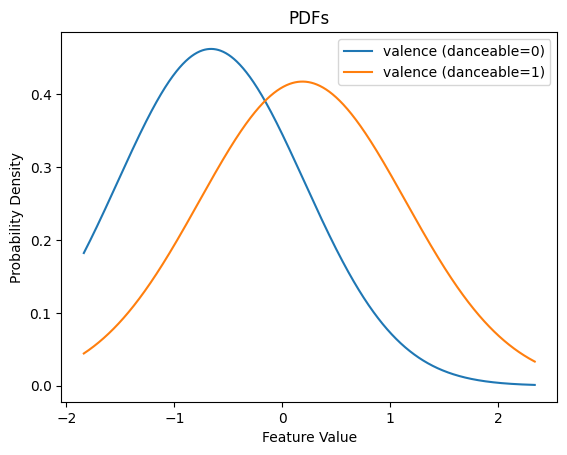

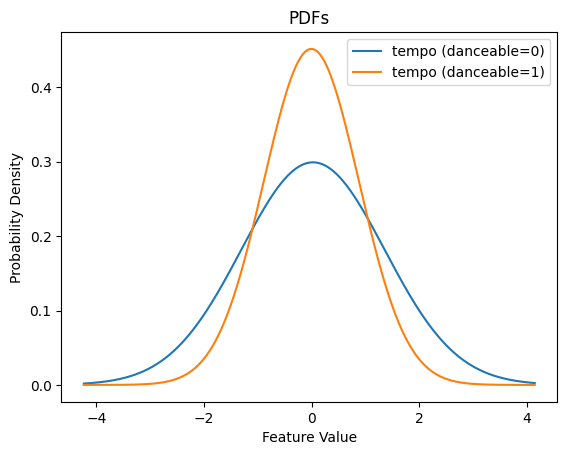

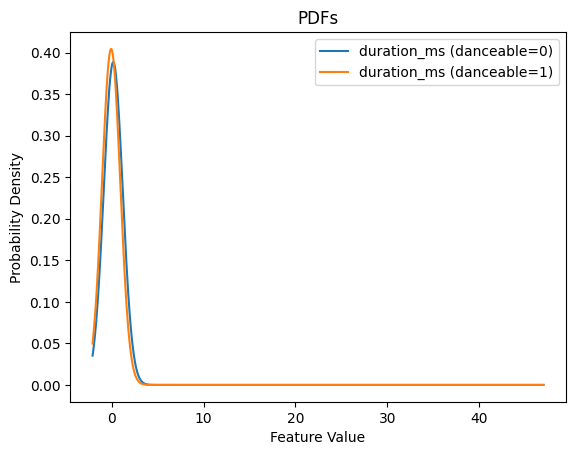

In [196]:
from scipy.stats import norm
import numpy as np


for f in ['msPlayed', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']:
    plt.figure()
    mean_0 = g.loc[0, (f, 'mean')]
    std_0 = g.loc[0, (f, 'std')]

    mean_1 = g.loc[1, (f, 'mean')]
    std_1 = g.loc[1, (f, 'std')]

    x = np.linspace(df[f].min(), df[f].max(), 1000)
    pdf_0 = norm.pdf(x, mean_0, std_0)
    pdf_1 = norm.pdf(x, mean_1, std_1)

    plt.plot(x, pdf_0, label=f'{f} (danceable=0)')
    plt.plot(x, pdf_1, label=f'{f} (danceable=1)')

    plt.title('PDFs')
    plt.xlabel('Feature Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

As shown in the diagrams. We should look for the features that we see the most difference in their PDAs, and we should also try to make the correlation of the features very low. According to the above graphs and the correlation matrix, we can see that liveness and duration will not cause much differentiation as a result of the data being dense.

In [197]:
train, test = train_test_split(df, test_size=0.2, random_state=40)

In [224]:


grouped = train.groupby('danceable').agg({'danceability': ['mean', 'std']})

mean_danceable = grouped.loc[1, ('danceability', 'mean')]
std_danceable = grouped.loc[1, ('danceability', 'std')]
pdf_danceable = norm(loc=mean_danceable, scale=std_danceable)

mean_non_danceable = grouped.loc[0, ('danceability', 'mean')]
std_non_danceable = grouped.loc[0, ('danceability', 'std')]
pdf_non_danceable = norm(loc=mean_non_danceable, scale=std_non_danceable)

predictions = []
for index, row in test.iterrows():
    prob_danceable = pdf_danceable.pdf(row['danceability'])
    prob_non_danceable = pdf_non_danceable.pdf(row['danceability'])

    if prob_danceable > 0.2:
        predictions.append(1)
    else:
        predictions.append(0)

test['Predicted_Danceable'] = predictions


In [226]:
test[['id', 'Predicted_Danceable']].to_csv('predictions.csv', index=False)

accuracy = np.sum(predictions == test['danceable'])/len(test)

print(f'Accuracy: {accuracy * 100:.2f} %')

Accuracy: 91.57 %


## Q **3.1**

In [200]:
from IPython.display import display, Math, Latex

Recall that the likelihood function L(μ) for a random sample X is calculated by the product of individual probabilities for each data observation, in such a way that after calculating the product of said products, a natural logarithm of the likelihood function (log-likelihood) then we substitute the expression p(x∣μ. ) into the log-likelihood and then to find the maximum likelihood estimator (MLE) of μ, we differentiate the log-likelihood with respect to μ, the derivative equals We put with zero and solve for μ:


In [201]:
display(Math(r'p(x|\mu) = \frac{e^-\frac{(x-\mu)^2}{2\sigma^2}}{\sqrt{2\pi}\sigma}'))

<IPython.core.display.Math object>

In [203]:
display(Math(r'L(\mu) = p(x_{1}∣μ)⋅p(x_{2}∣μ)⋅…⋅p(x_{n}∣μ)'))

<IPython.core.display.Math object>

In [204]:
display(Math(r'ln (L(\mu)) = ln(p(x_{1}∣μ)) + ln(p(x_{2}∣μ)) + … + ln(p(x_{n}∣μ))'))

<IPython.core.display.Math object>

In [205]:
display(Math(r'ln (L(\mu)) = \sum_{i = 1}^{n}(-\frac{(x-\mu)^2}{2\sigma^2} - ln(\sqrt{2\pi}\sigma))'))

<IPython.core.display.Math object>

In [206]:
display(Math(r'\frac{d }{d\mu} ln(L(\mu)) = \sum_{i=1}^{n}(x_{i} - \mu) = 0'))

<IPython.core.display.Math object>

In [207]:
display(Math(r'\sum_{i=1}^{n}x_{i} - n\mu = 0 \to \mu = \frac{1}{n}\sum_{i=1}^{n}x_{i}'))

<IPython.core.display.Math object>

In [208]:
display(Math(r'\mu = \frac{1}{n}\sum_{i=1}^{n}x_{i}'))

<IPython.core.display.Math object>

# Q 3.2

In [213]:
arr = np.array([[10, -9],[4, 2]])

A - λI = [[10 - λ, -9], [4, 2 - λ]]

det(A - λI) = (10 - λ)(2 - λ) - (-9)(4) = λ^2 - 12λ + 38

λ^2 - 12λ + 38 = 0

λ = (12 ± √(12^2 - 4 * 38)) / 2 λ = 6 ± √(-4)

λ1 = 6 + 2i
λ2 = 6 - 2i

For each eigenvalue, the following system of equations shall be solved:

(A - λI)v = 0

- For eigenvalue λ1 = 6 + 2i:

A - λ1I = [[10 - (6 + 2i), -9], [4, 2 - (6 + 2i)]] = [[4 - 2i, -9], [4, -4 - 2i]] = B1

Solving (B1)v1 = 0 will result the eigenvector v1.

- For eigenvalue λ2 = 6 - 2i:

A - λ2I = [[10 - (6 - 2i), -9], [4, 2 - (6 - 2i)]] = [[4 + 2i, -9], [4, 2i - 8]] = B2

Solving (B2)v2 = 0 will result the eigenvector v2.


In [214]:
eigenvalues, eigenvectors = np.linalg.eig(arr)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:")
for i in range(len(eigenvalues)):
    print(f"For eigenvalue {i+1}: {eigenvectors[:, i]}")

Eigenvalues: [6.+4.47213595j 6.-4.47213595j]
Eigenvectors:
For eigenvalue 1: [0.83205029+0.j         0.36980013-0.41344912j]
For eigenvalue 2: [0.83205029-0.j         0.36980013+0.41344912j]


Q 3.3

In [215]:
A = np.array([[0, -1, 5],[2, 4, 6], [1, 1, 5]])
rank = np.linalg.matrix_rank(A)
print("Rank of matrix A:", rank)

Rank of matrix A: 3
